**La siguiente rutina permite simular el proceso de filtrado espacial de imágenes usando la Transformada de Fourier en dos dimensiones**

In [ ]:
# LIBRERIAS
import matplotlib
import numpy as np
import matplotlib.pylab as plt
from scipy.io import wavfile
import cmath as cm
from skimage import io
from scipy.ndimage import rotate

%matplotlib inline
plt.rcParams['figure.figsize'] = 26, 12 # para modificar el tamaño de la figura
#matplotlib.rc('xtick', labelsize=20)
#matplotlib.rc('ytick', labelsize=20)
font = {'weight' : 'bold',
        'size'   : 24}

matplotlib.rc('font', **font)


A continuación se carga la imagen a filtrar. Esta puede ser un archivo de texto o una imagen con extensión bmp o tif

In [ ]:
#############
# Código de Google Colaboratory para subir el archivo .txt y trabajar con él
from google.colab import drive
drive.mount('/content/gdrive')

!cp '/content/gdrive/My Drive/Colab Notebooks/Imagen_una_frecuencia.tif' 'Imagen_una_frecuencia.tif'
!cp '/content/gdrive/My Drive/Colab Notebooks/Imagen_para_filtrado.tif' 'Imagen_para_filtrado.tif'

Mounted at /content/gdrive


A continuación se carga el archivo y se toma la transformada de Fourier en 2 D, para simular el proceso de filtrado espacial

In [ ]:
#FILTROS
def rendija(N,x,ang,esp):
  filt = np.zeros((N,N))
  dp=x
  filt[int(N/2+dp-esp/2):int(N/2+dp+esp/2),:] = 1
  return rotate(filt,ang,reshape=False)

## **Tarea:** Diseñar funciones que permitan filtrar solo una o dos frecuencias. Proponga filtros que permitan seleccionar una pequeña porción de la región central, o al contrario, que eliminen solo una pequeña porción central y mantenga la región restante

(700.0, 320.0)

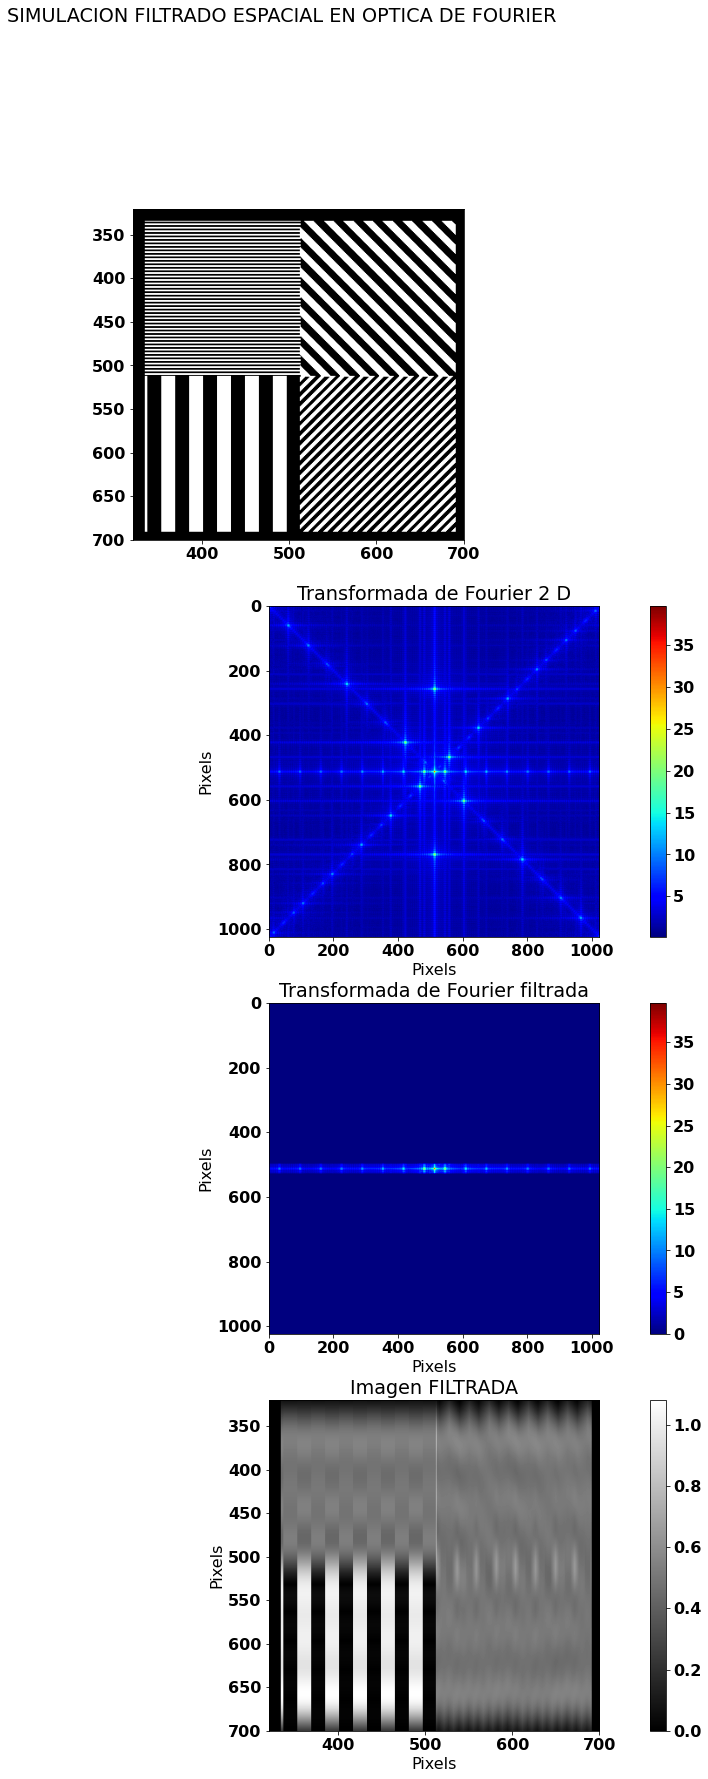

In [ ]:
# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(18,28))
fig.subplots_adjust(hspace=0.2)
fig.suptitle('SIMULACION FILTRADO ESPACIAL EN OPTICA DE FOURIER')

################################################

# Datos de la imagen a filtrar

#IM1 = io.imread('Imagen_una_frecuencia.tif')
IM1 = io.imread('Imagen_para_filtrado.tif')
IM1=IM1/np.max(IM1)
#IM1=1*np.exp(1j*IM1)
I1=np.abs(IM1**2)
#IM1 = rotate(IM1, angle=45,reshape=False)

dx=1;

# Tranformada de Fourier: espectro de frecuencias de la imagen

TF_IM1 = np.fft.ifftshift(np.fft.fft2(np.fft.fftshift(IM1)))*dx

## AQUI SE REALIZA EL FILTRADO SOBRE TF_IM1

# ang: es el ángulo en grados de la rendija, esp: es el espesor de la rendija en pixeles
filtro = rendija(len(TF_IM1[0,:]),0,ang=0,esp=30)
#filtro2= rendija(len(TF_IM1[0,:]),ang=0,esp=50)
#plt.imshow(filtro)
#TF_IM11 = TF_IM1
TF_IM11 = TF_IM1*(filtro)

## AQUI SE RECUPERA LA IMAGEN CON LA TRANSFORMADA INVERSA

iTF_IM1= np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift(TF_IM11)))*1/dx

## SE MUESTRAN LOS RESULTADOS (3 PLANOS)

# imagen original
plt.subplot(4,1,1)
plt.imshow(I1, cmap='gray')
#plt.title('Imagen ORIGINAL')
#plt.ylabel('Pixels')
#plt.xlabel('Pixels')
#plt.colorbar()
plt.xlim(320,700) ## zoom para ver mejor la imagen
plt.ylim(700,320) ## zoom para ver mejor la imagen
#plt.xlim(320,700) ## zoom para ver mejor la imagen
#plt.ylim(400,350) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS

# transformada de fourier
plt.subplot(4,1,2)
plt.imshow(abs(TF_IM1)**(1/3), cmap='jet')
plt.title('Transformada de Fourier 2 D')
plt.ylabel('Pixels')
plt.xlabel('Pixels')
plt.colorbar()
#plt.xlim(320,700) ## zoom para ver mejor la imagen
#plt.ylim(700,320) ## zoom para ver mejor la imagen


# transformada de fourier filtrada
plt.subplot(4,1,3)
plt.imshow(abs(TF_IM11)**(1/3), cmap='jet')
plt.title('Transformada de Fourier filtrada')
plt.ylabel('Pixels')
plt.xlabel('Pixels')
plt.colorbar()

#Imagen final filtrada
plt.subplot(4,1,4)
plt.imshow(abs(iTF_IM1)**(1), cmap='gray')
plt.title('Imagen FILTRADA')
plt.ylabel('Pixels')
plt.xlabel('Pixels')
plt.colorbar()
plt.xlim(320,700) ## zoom para ver mejor la imagen
plt.ylim(700,320) ## zoom para ver mejor la imagen




**Tarea:** Realice las modificaciones necesarias al filtro para que se quede solo con las frecuencias bajas. Haga lo propio para seleccionar solo las frecuencias altas